In [16]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [17]:
df = pd.read_csv('Tesla Data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [18]:
df.shape

(1692, 7)

In [19]:
print('start date')
df['Date'].tolist()[0]

start date


'29-06-2010'

In [20]:
print('end date')
df['Date'].tolist()[-1]

end date


'17-03-2017'

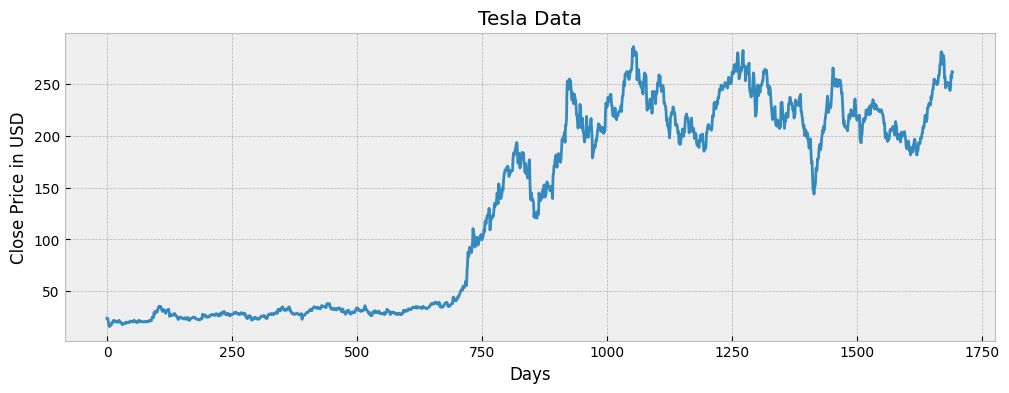

In [21]:
plt.figure(figsize=(12,4))
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.title('Tesla Data')
plt.plot(df['Close'])
plt.show()

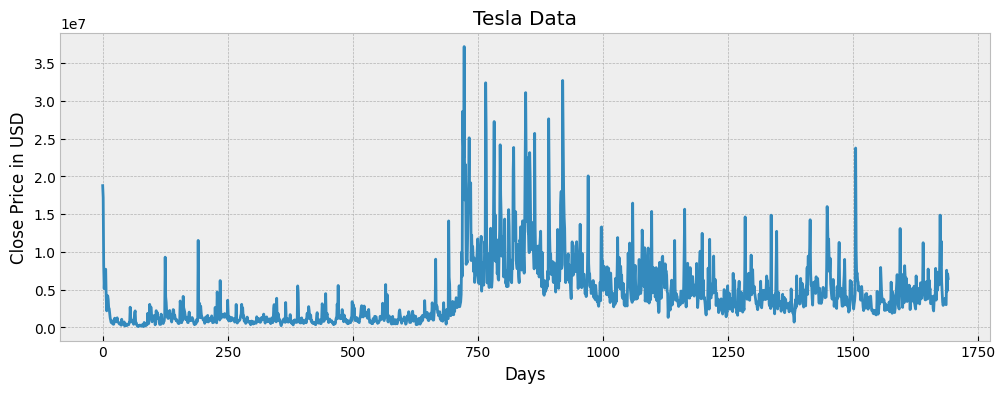

In [22]:
plt.figure(figsize=(12,4))
plt.xlabel('Days')
plt.ylabel('Close Price in USD')
plt.title('Tesla Data')
plt.plot(df['Volume'])
plt.show()

In [23]:
# find total no. of days 
total_days = df['Date'].value_counts().to_dict()
len(total_days)

1692

In [24]:
df=df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [25]:
future_days=180
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
1688,258.000000,NaN
1689,255.729996,NaN
1690,262.049988,NaN
1691,261.500000,NaN


In [26]:
df.head(4)

,Close,Prediction
0,23.889999,22.820000
1,23.830000,22.809999
2,21.959999,22.959999
3,19.200001,22.730000


In [27]:
#Create the features data set(X)
X = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [198.550003]
 [201.789993]
 [210.190002]]


In [28]:
X

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [198.550003],
       [201.789993],
       [210.190002]])

In [29]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 22.82      22.809999  22.959999 ... 255.729996 262.049988 261.5     ]


In [30]:
#split the data and 75% for trainning and 25% for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 50)

In [31]:
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

#fiting the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [32]:
#find the last 'x' rows of the features data set
x_future = df.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[219.25    ],
       [216.880005],
       [221.309998],
       [227.009995],
       [228.100006],
       [213.029999],
       [210.089996],
       [211.720001],
       [209.089996],
       [215.259995],
       [210.350006],
       [212.960007],
       [211.630005],
       [206.929993],
       [213.789993],
       [208.350006],
       [231.630005],
       [231.770004],
       [232.360001],
       [225.330002],
       [216.5     ],
       [219.080002],
       [212.940002],
       [207.190002],
       [214.309998],
       [214.      ],
       [221.070007],
       [221.800003],
       [220.009995],
       [217.75    ],
       [218.25    ],
       [229.639999],
       [231.610001],
       [230.259995],
       [237.190002],
       [231.990005],
       [232.710007],
       [230.380005],
       [231.130005],
       [226.720001],
       [224.520004],
       [227.070007],
       [217.020004],
       [218.580002],
       [221.089996],
       [234.509995],
       [233.389999],
       [230.4

In [33]:
#prediction using Decision Tree
tree_prediction = tree.predict(x_future)
print(tree_prediction)

#prediction using Decision Tree linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[248.910004   216.5        213.979996   214.440002   215.940002
 216.779999   238.47333267 224.649994   222.529999   221.529999
 220.399994   218.044998   225.259995   228.360001   220.5
 204.039993   230.009995   229.509995   228.490005   230.610001
 234.789993   230.009995   227.199997   222.4349975  230.610001
 230.029999   226.160004   229.080002   225.649994   224.910004
 225.610001   225.589996   223.610001   207.709999   211.9649965
 225.         222.929993   224.839996   222.619995   209.755005
 219.990005   215.199997   211.339996   212.009995   200.770004
 197.779999   202.830002   201.710007   197.360001   194.470001
 239.010002   196.050003   196.410004   211.9649965  205.399994
 206.339996   204.639999   205.220001   206.429993   207.449997
 208.990005   205.809998   218.6200025  200.699997   204.029999
 213.699997   211.410004   208.460007   201.         196.610001
 200.949997   238.929993   201.509995   200.240005   196.509995
 193.960007   199.100006   203.559998   199.

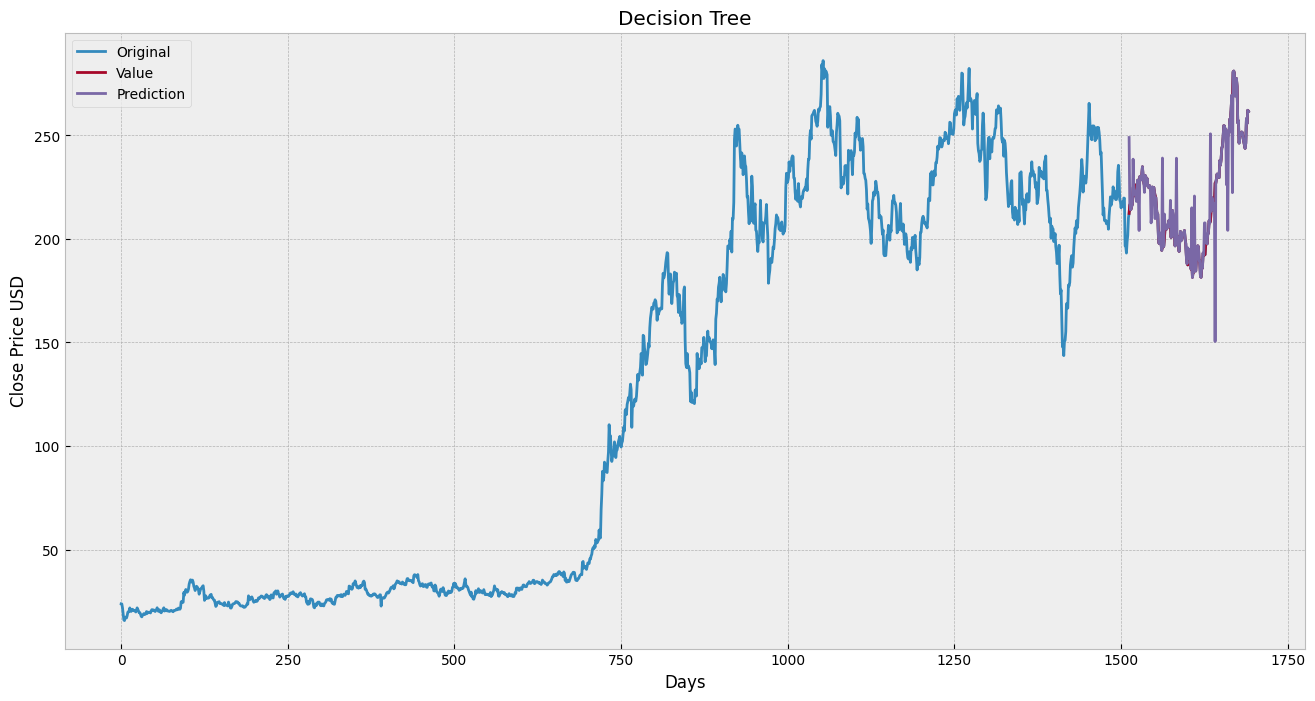

In [34]:
#visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()

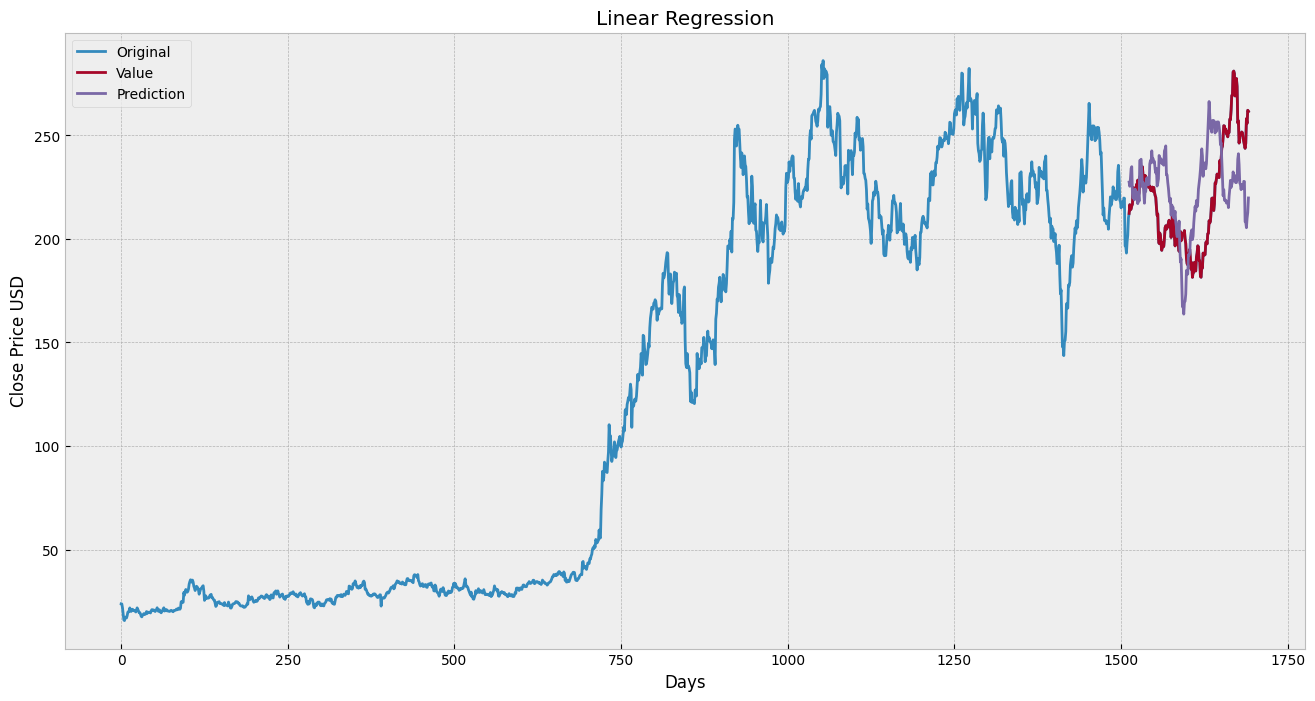

In [35]:
#visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()